In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# !pip install pandas fastparquet

In [ ]:
# how to actually load and see the first set? 
first_file = '/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet'
df = pd.read_parquet(first_file)

In [4]:
# how to actually load and see the first set? 
# first_file = '/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet'

# now trying to load it into a dataframe
# try:
#     df = pd.read_parquet(first_file)
#     print(df.head())
# except FileNotFoundError:
#     print(f"Error: File not found {first_file}")
# except Exception as e: 
#     print(f"Error occured when loading file: {e}")

In [5]:
# how do i even look at 79 features and 9 responders T_T 
# how about i try to look at 10 x 10, at each turn
# just do index... 4 onwards -> 

# df = pd.read_parquet(first_file)
# print(df.shape) # (1944210, 92)
# first_ten = df.head(10).iloc[0:9, 4:14]
# print(first_ten)

# for i in range(4, 85, 10):
#     print(df.iloc[0:9, i:i+10])

(1944210, 92)


<Axes: >

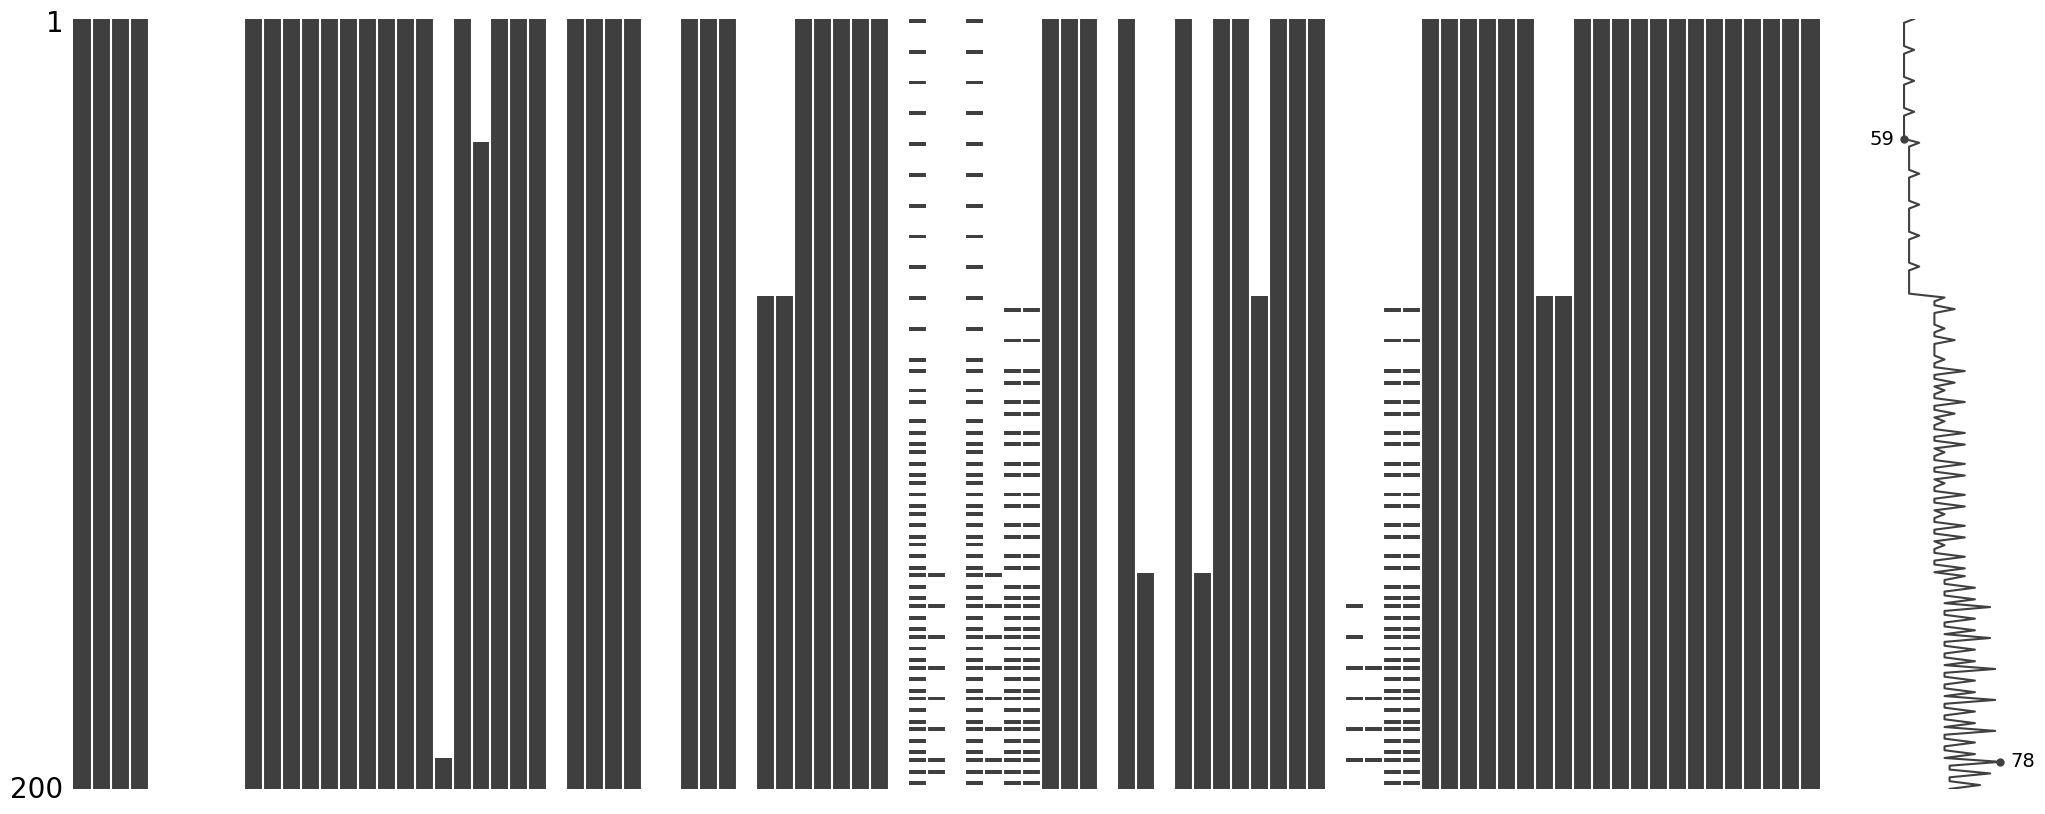

In [14]:
# huhuh okay so chatgpt suggests i can maybe first deal with NaN: 

# df.isnull().sum()
# for i in range(4, 85, 10):
#     print(df.iloc[:, i:i+10].isnull().sum()) 

# looks like there are some at least within this first data set - # (1944210, 92) which are truly all NaN: feature00_04, 
# even based on the NaN count, there are some that look identical: 
    # feature_18, feature_19 
    # feature_32, feature_33
    # feature_45, feature_46
    # feature_50, feature_53
    # feature_52, feature_55
    # feature_56, feature_57
    # feature_73, feature_74...

# check NaN values - dang even seeing this visual matrix shows what is just... empty LOL 
import missingno as msno
msno.matrix(df.iloc[0:200, 0:100])

In [16]:
# going for df.describe() all at once is too much, need to break it up into 10s.
for i in range(4, 85, 10):
    print(df.iloc[:, i:i+10].describe()) 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


       feature_00  feature_01  feature_02  feature_03  feature_04  \
count         0.0         0.0         0.0         0.0         0.0   
mean          NaN         NaN         NaN         NaN         NaN   
std           NaN         NaN         NaN         NaN         NaN   
min           NaN         NaN         NaN         NaN         NaN   
25%           NaN         NaN         NaN         NaN         NaN   
50%           NaN         NaN         NaN         NaN         NaN   
75%           NaN         NaN         NaN         NaN         NaN   
max           NaN         NaN         NaN         NaN         NaN   

         feature_05    feature_06    feature_07    feature_08    feature_09  
count  1.944210e+06  1.944210e+06  1.944210e+06  1.927230e+06  1.944210e+06  
mean  -4.463176e-02 -6.456064e-03 -1.984165e-02  5.979729e-02  2.862838e+01  
std    9.471079e-01  9.340423e-01  9.664304e-01  9.221880e-01  2.391003e+01  
min   -1.176608e+01 -2.514354e+01 -2.032179e+01 -6.224619e+00  4.0

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


         feature_20  feature_21    feature_22    feature_23    feature_24  \
count  1.944210e+06         0.0  1.944210e+06  1.944210e+06  1.944210e+06   
mean   3.258846e-01         NaN  4.290666e-01  3.990524e-01 -9.992675e-01   
std    1.025965e+00         NaN  9.430034e-01  8.806974e-01  7.335943e-01   
min   -3.294369e+00         NaN -1.971631e+00 -1.752133e+00 -3.110884e+00   
25%   -4.288817e-01         NaN -2.497960e-01 -1.518557e-01 -1.476237e+00   
50%    3.495255e-01         NaN  3.141265e-01  3.579529e-01 -1.069806e+00   
75%    1.017450e+00         NaN  1.009719e+00  1.009176e+00 -6.726367e-01   
max    4.541540e+00         NaN  3.755303e+00  2.896742e+00  3.376201e+00   

         feature_25  feature_26  feature_27    feature_28    feature_29  
count  1.944210e+06         0.0         0.0  1.944210e+06  1.944210e+06  
mean   1.962329e-01         NaN         NaN  1.639885e-01 -1.937155e-02  
std    9.946557e-01         NaN         NaN  9.363128e-01  8.288157e-01  
min   -1.6

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


         feature_30  feature_31    feature_32    feature_33    feature_34  \
count  1.944210e+06         0.0  1.922473e+06  1.922473e+06  1.944210e+06   
mean   3.812157e-01         NaN -1.408765e-01 -8.343091e-03 -1.458559e-01   
std    1.089068e+00         NaN  9.256055e-01  1.243444e+00  8.319328e-01   
min   -1.059913e+00         NaN -3.743401e+00 -4.335631e+00 -3.763025e+00   
25%   -2.217088e-01         NaN -7.078161e-01 -9.170747e-01 -6.596854e-01   
50%    5.011619e-02         NaN -8.192695e-02 -2.960069e-03 -8.531489e-02   
75%    4.967157e-01         NaN  4.646903e-01  9.145628e-01  4.333037e-01   
max    9.321818e+00         NaN  4.302386e+00  4.228292e+00  5.069967e+00   

         feature_35    feature_36    feature_37    feature_38    feature_39  
count  1.944210e+06  1.944210e+06  1.944210e+06  1.944210e+06  1.619478e+06  
mean  -1.435220e-01  1.190174e-03  3.570056e-02  6.805061e-02 -2.994906e-01  
std    8.407459e-01  1.187869e+00  1.013728e+00  1.049494e+00  1.450749e

In [25]:
# there are features with count = 0 
# df.all() checks if all "columns" are true - so we turn it into isna() for easier parsing
# print(df.columns[df.isna().all()].tolist()) # ['feature_00', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_21', 'feature_26', 'feature_27', 'feature_31']

# first I want to see % of na ... chatgpt suggests if 80% drop it, but right now it seems that percentage is less than 17% 
features_only = df.filter(regex='^feature_')
percentage_nan = features_only.isna().sum() / len(features_only)
print(percentage_nan.to_string()) 

feature_00    1.000000
feature_01    1.000000
feature_02    1.000000
feature_03    1.000000
feature_04    1.000000
feature_05    0.000000
feature_06    0.000000
feature_07    0.000000
feature_08    0.008734
feature_09    0.000000
feature_10    0.000000
feature_11    0.000000
feature_12    0.000000
feature_13    0.000000
feature_14    0.000000
feature_15    0.028285
feature_16    0.000032
feature_17    0.004748
feature_18    0.000030
feature_19    0.000030
feature_20    0.000000
feature_21    1.000000
feature_22    0.000000
feature_23    0.000000
feature_24    0.000000
feature_25    0.000000
feature_26    1.000000
feature_27    1.000000
feature_28    0.000000
feature_29    0.000000
feature_30    0.000000
feature_31    1.000000
feature_32    0.011180
feature_33    0.011180
feature_34    0.000000
feature_35    0.000000
feature_36    0.000000
feature_37    0.000000
feature_38    0.000000
feature_39    0.167025
feature_40    0.019714
feature_41    0.049950
feature_42    0.167025
feature_43 

In [27]:
features_1_no_nan = features_only.dropna(axis=1, how='all') 
print(features_1_no_nan.shape) # (1944210, 70) uhhhhh still so many!!! 

(1944210, 70)


In [29]:
# maybe... let's try correlating with the target..... 

df2 = features_1_no_nan.join(df['responder_6'])
print(df2.head())

   feature_05  feature_06  feature_07  feature_08  feature_09  feature_10  \
0    0.851033    0.242971    0.263400   -0.891687          11           7   
1    0.676961    0.151984    0.192465   -0.521729          11           7   
2    1.056285    0.187227    0.249901   -0.773050          11           7   
3    1.139366    0.273328    0.306549   -1.262223          42           5   
4    0.955200    0.262404    0.344457   -0.613813          44           3   

   feature_11  feature_12  feature_13  feature_14  ...  feature_70  \
0          76   -0.883028    0.003067   -0.744703  ...   -1.022690   
1          76   -0.865307   -0.225629   -0.582163  ...   -1.052685   
2          76   -0.675719   -0.199404   -0.586798  ...   -0.863230   
3         150   -0.694008    3.004091    0.114809  ...   -0.530602   
4          16   -0.947351   -0.030018   -0.502379  ...   -1.141761   

   feature_71  feature_72  feature_73  feature_74  feature_75  feature_76  \
0    0.152241   -0.659864         NaN  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [30]:
corr = df2.corr()['responder_6']
target_corr = corr.abs().sort_values(ascending=False)
print(target_corr)

responder_6    1.000000
feature_06     0.087681
feature_07     0.066128
feature_05     0.035586
feature_68     0.027078
                 ...   
feature_58     0.000943
feature_20     0.000851
feature_73     0.000733
feature_53     0.000590
feature_11     0.000367
Name: responder_6, Length: 71, dtype: float64


In [32]:
print(target_corr.to_string()) # looks like not that many strong correlations
# responder_6    1.000000
# feature_06     0.087681
# feature_07     0.066128
# feature_05     0.035586
# feature_68     0.027078
# feature_51     0.026465
# feature_19     0.024511
# feature_08     0.022325
# feature_69     0.022006
# feature_56     0.020750
# feature_13     0.019468
# feature_52     0.019101
# feature_54     0.018571
# feature_45     0.018235
# feature_38     0.018021
# feature_18     0.017867
# feature_37     0.017838
# feature_14     0.016198
# feature_59     0.016044
# feature_66     0.015314
# feature_65     0.014706
# feature_60     0.013723
# feature_57     0.013435
# feature_46     0.010571

responder_6    1.000000
feature_06     0.087681
feature_07     0.066128
feature_05     0.035586
feature_68     0.027078
feature_51     0.026465
feature_19     0.024511
feature_08     0.022325
feature_69     0.022006
feature_56     0.020750
feature_13     0.019468
feature_52     0.019101
feature_54     0.018571
feature_45     0.018235
feature_38     0.018021
feature_18     0.017867
feature_37     0.017838
feature_14     0.016198
feature_59     0.016044
feature_66     0.015314
feature_65     0.014706
feature_60     0.013723
feature_57     0.013435
feature_46     0.010571
feature_55     0.008626
feature_32     0.008208
feature_67     0.008199
feature_47     0.007691
feature_33     0.007435
feature_28     0.006437
feature_35     0.005874
feature_10     0.005827
feature_36     0.005821
feature_40     0.005623
feature_43     0.005017
feature_50     0.004857
feature_70     0.004833
feature_39     0.004539
feature_75     0.004073
feature_72     0.003944
feature_16     0.003847
feature_17     0

<Axes: >

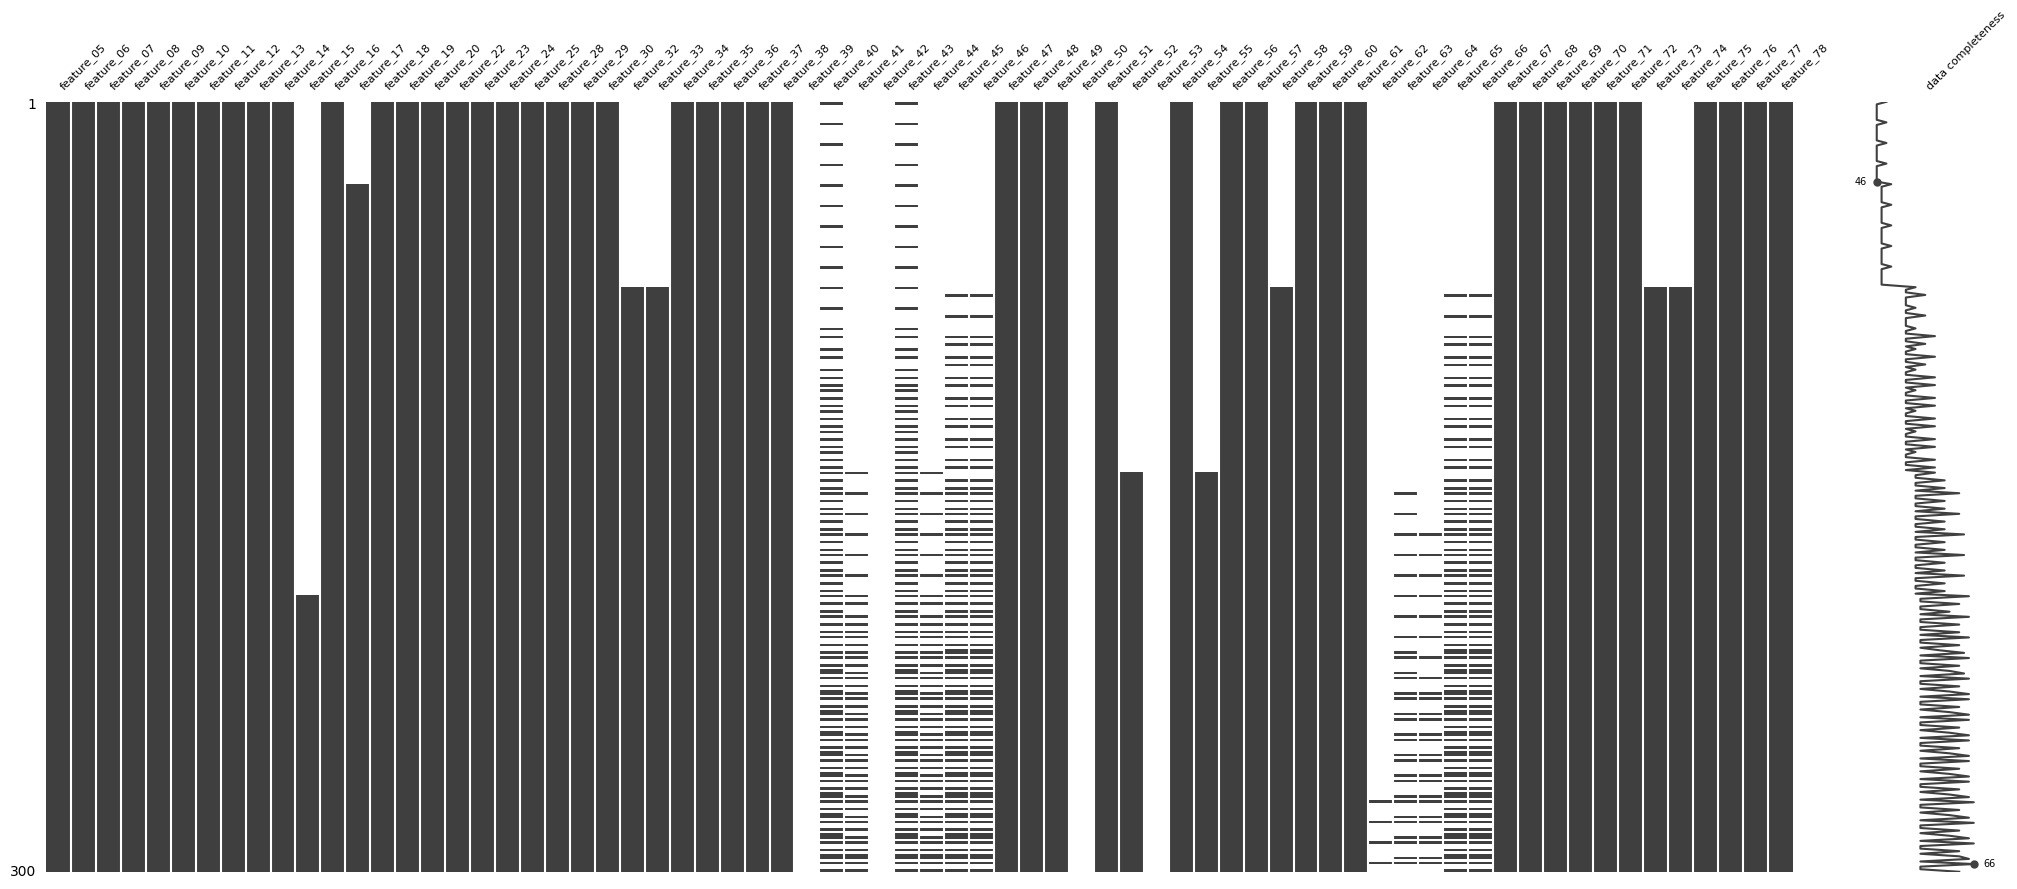

In [34]:
msno.matrix(features_1_no_nan.iloc[0:300, 0:100], labels=True, fontsize=8)
# ones that look similar: 32, 33, 58, 73, 74 
# 40, 43 
# 41, 44 
# 45, 46, 65, 66

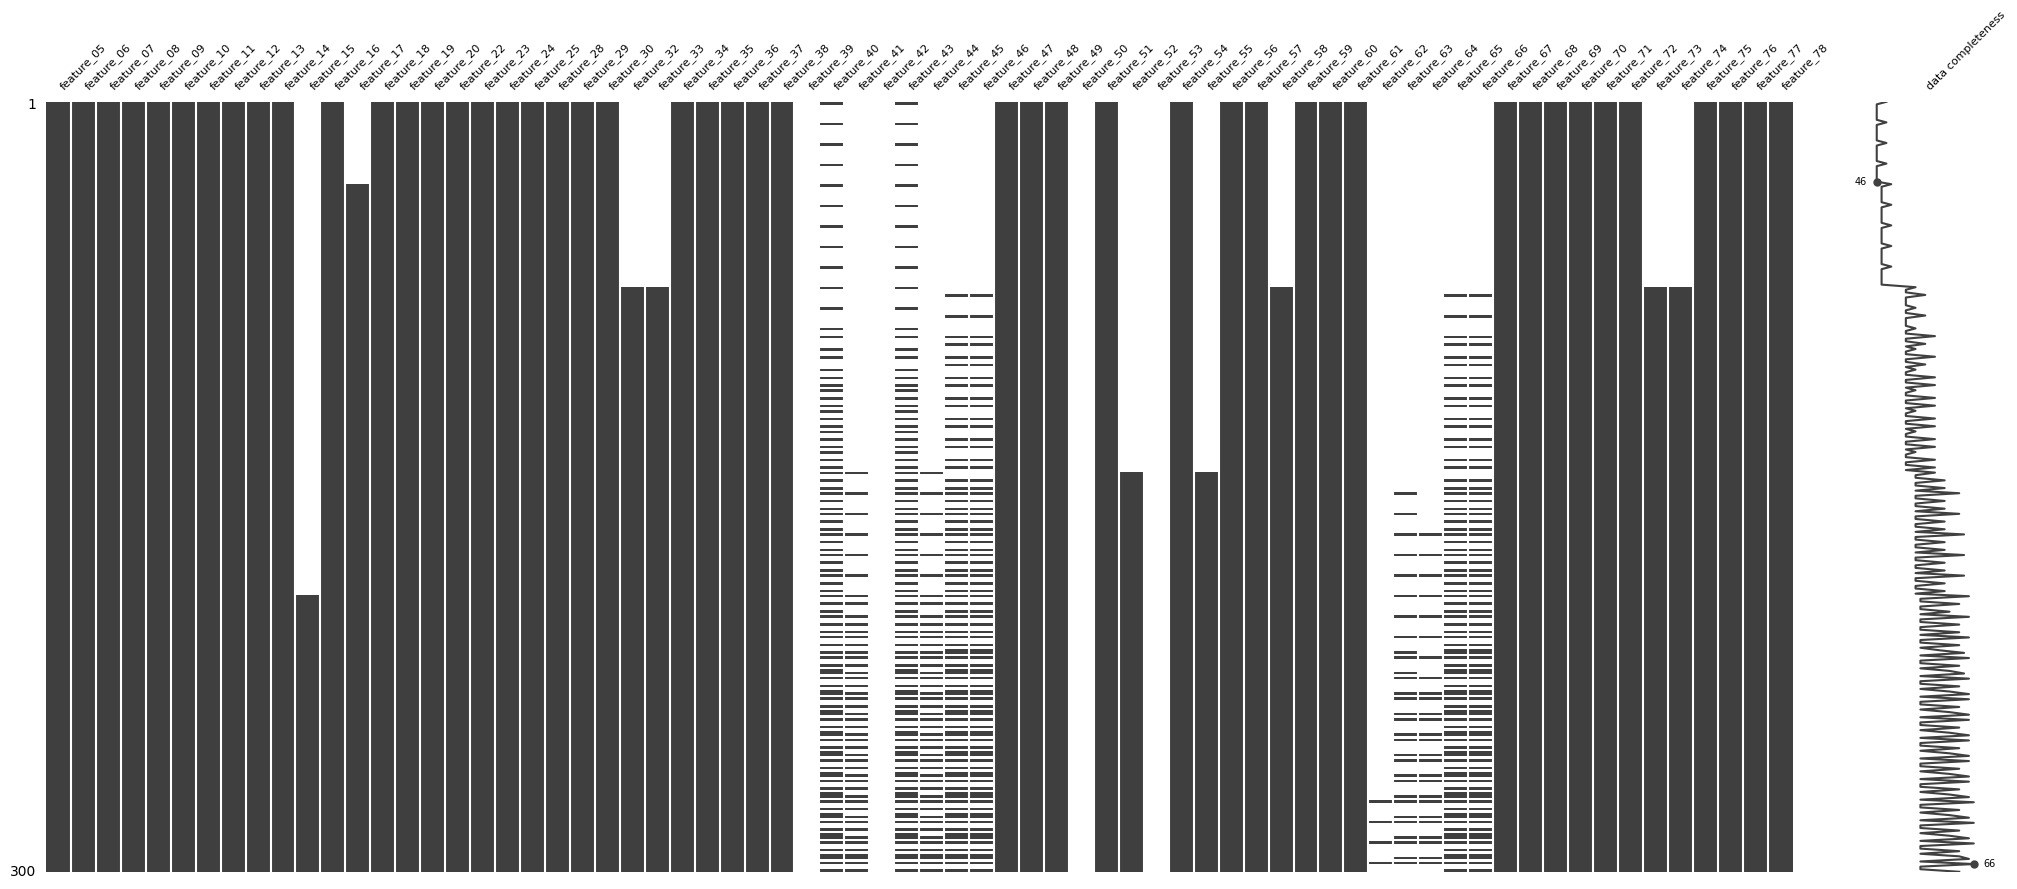
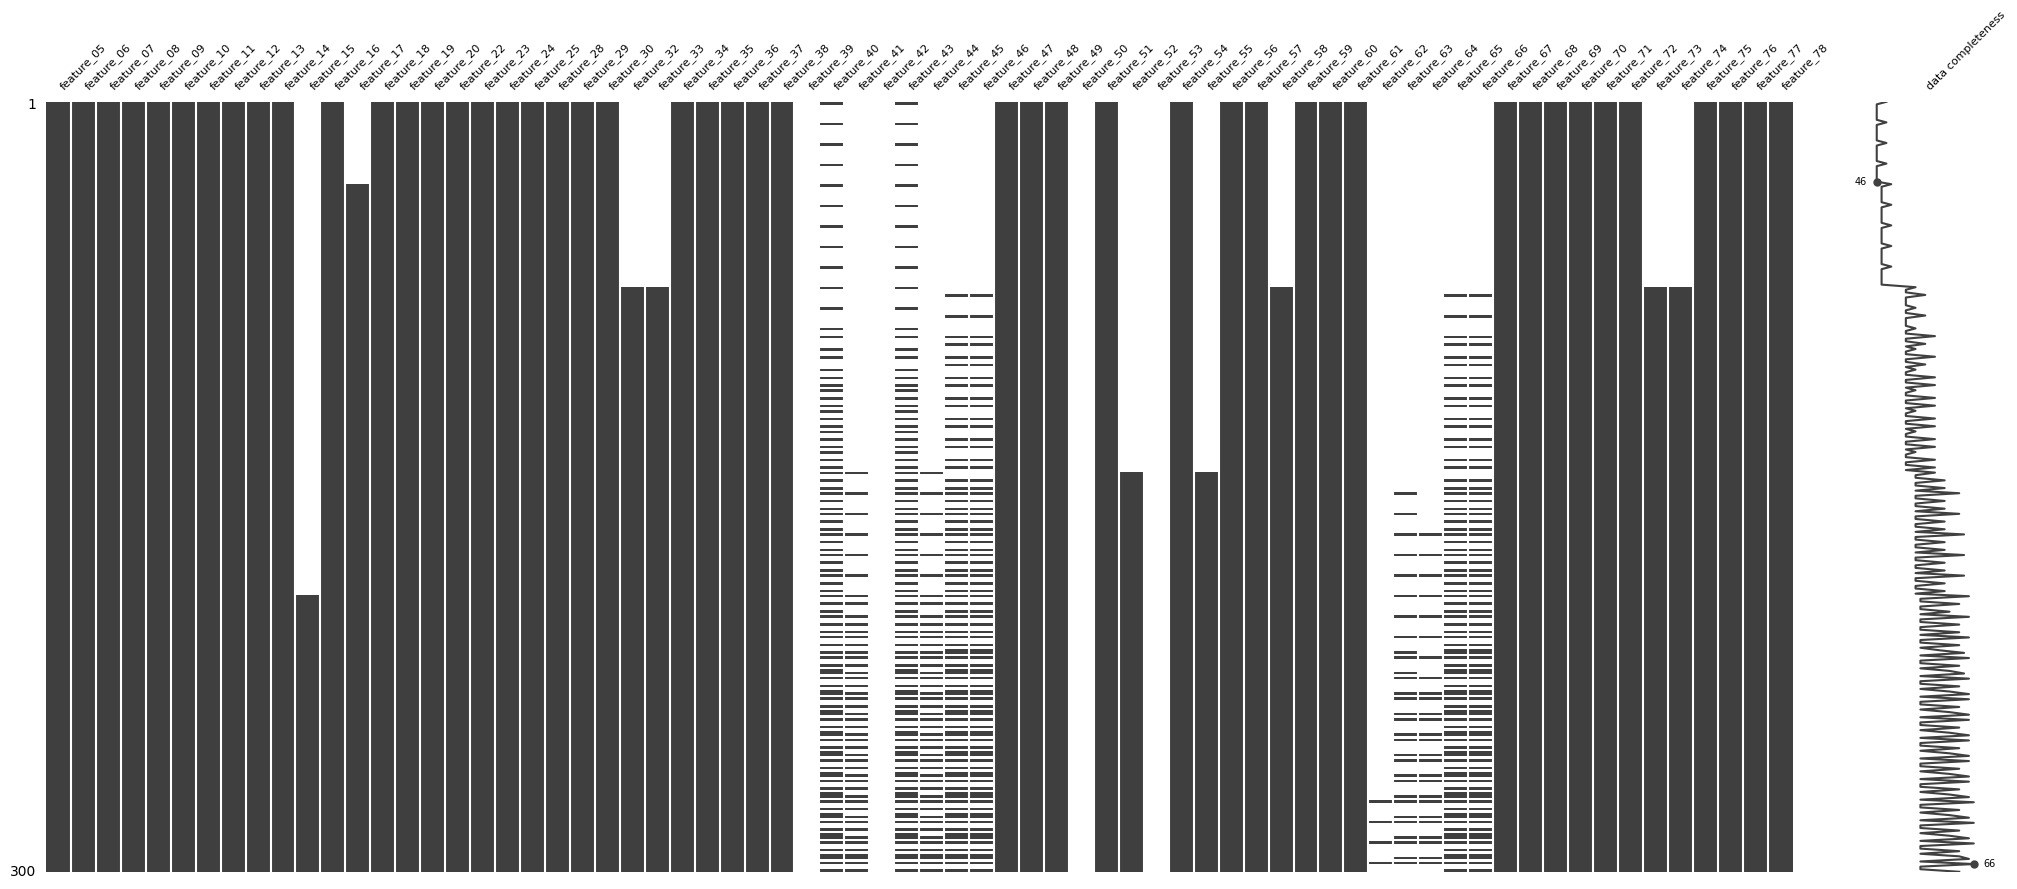

In [36]:
df1 = features_1_no_nan

columns = [
    ['feature_32', 'feature_33', 'feature_58', 'feature_73', 'feature_74'],
    ['feature_40', 'feature_43'],
    ['feature_41', 'feature_44'],
    ['feature_45', 'feature_46', 'feature_65', 'feature_66']
]

print(df1['feature_40'].corr(df1['feature_43'])) # 0.9492106704314767

0.9492106704314767


In [37]:
print(df1['feature_41'].corr(df1['feature_44'])) # 0.8432560514296675

0.8432560514296675


<Axes: >

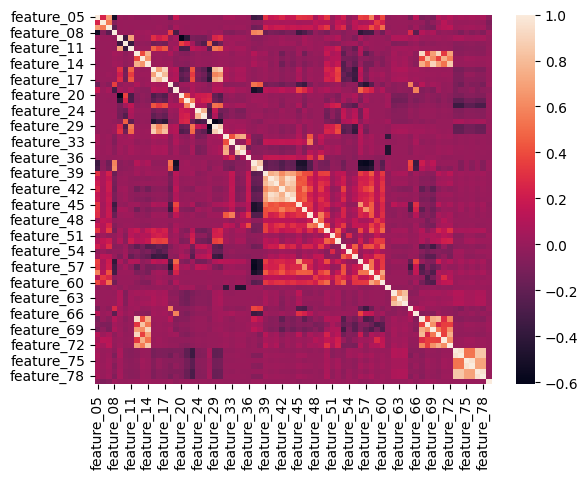

In [41]:
import seaborn as sns

corr = df2.corr()
sns.heatmap(corr) # ooh we get a nice lil graphic.

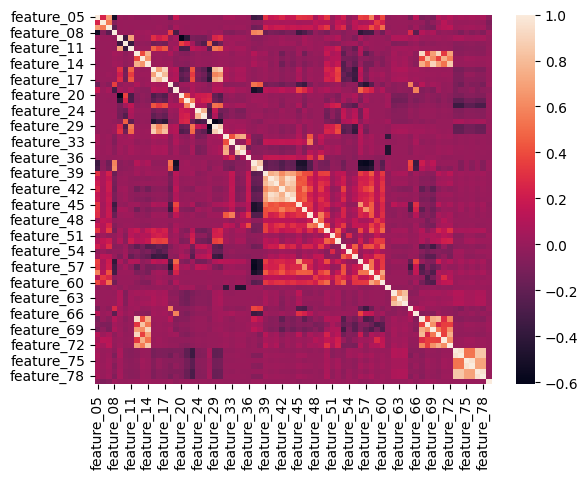

In [42]:
print(df.head(50)) # we see that there's time_ids in order, and only symbols: 1, 7, 9, 10, 14, 16, 19, 33

    date_id  time_id  symbol_id    weight  feature_00  feature_01  feature_02  \
0         0        0          1  3.889038         NaN         NaN         NaN   
1         0        0          7  1.370613         NaN         NaN         NaN   
2         0        0          9  2.285698         NaN         NaN         NaN   
3         0        0         10  0.690606         NaN         NaN         NaN   
4         0        0         14  0.440570         NaN         NaN         NaN   
5         0        0         16  1.118269         NaN         NaN         NaN   
6         0        0         19  2.456331         NaN         NaN         NaN   
7         0        0         33  1.663408         NaN         NaN         NaN   
8         0        1          1  3.889038         NaN         NaN         NaN   
9         0        1          7  1.370613         NaN         NaN         NaN   
10        0        1          9  2.285698         NaN         NaN         NaN   
11        0        1        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# I never looked at the data correctly SOBBBB 

so it's organized as the following: 
- `date_id` , `time_id` , `symbol_id`
    - at least in the first set, it follows ~8 symbols... i can group by these.... x_x 
    - we don't have the actual intervals of date_id
    - _we should be able to handle NEW symbol IDs as well..._ 
- `weight` scores each `symbol_id` and it's repeated - so we probably want to maximize the weights as possible...???

In [44]:
# ok, now that i'm actually THINKING, let me filter by symbol1

df_1 = df.loc[df['symbol_id'] == 1] # shape: (143481, 92) 143481 = 849 * 169. 
print(df_1.head(30)) 

# date_id 0 -> 169 , timeid from 0 -> 848. although the actual time intervals between time_id values may vary. 

     date_id  time_id  symbol_id    weight  feature_00  feature_01  \
0          0        0          1  3.889038         NaN         NaN   
8          0        1          1  3.889038         NaN         NaN   
16         0        2          1  3.889038         NaN         NaN   
24         0        3          1  3.889038         NaN         NaN   
32         0        4          1  3.889038         NaN         NaN   
40         0        5          1  3.889038         NaN         NaN   
48         0        6          1  3.889038         NaN         NaN   
56         0        7          1  3.889038         NaN         NaN   
64         0        8          1  3.889038         NaN         NaN   
72         0        9          1  3.889038         NaN         NaN   
80         0       10          1  3.889038         NaN         NaN   
88         0       11          1  3.889038         NaN         NaN   
96         0       12          1  3.889038         NaN         NaN   
104        0       1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [45]:
print(df_1.tail(30))

         date_id  time_id  symbol_id   weight  feature_00  feature_01  \
1943641      169      819          1  2.67119         NaN         NaN   
1943660      169      820          1  2.67119         NaN         NaN   
1943679      169      821          1  2.67119         NaN         NaN   
1943698      169      822          1  2.67119         NaN         NaN   
1943717      169      823          1  2.67119         NaN         NaN   
1943736      169      824          1  2.67119         NaN         NaN   
1943755      169      825          1  2.67119         NaN         NaN   
1943774      169      826          1  2.67119         NaN         NaN   
1943793      169      827          1  2.67119         NaN         NaN   
1943812      169      828          1  2.67119         NaN         NaN   
1943831      169      829          1  2.67119         NaN         NaN   
1943850      169      830          1  2.67119         NaN         NaN   
1943869      169      831          1  2.67119      

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [48]:
df_1_day_1 = df_1[df_1['date_id'] == 1]
print(df_1_day_1.head(10))
print(df_1_day_1.tail(10))

      date_id  time_id  symbol_id    weight  feature_00  feature_01  \
6793        1        0          1  3.911768         NaN         NaN   
6805        1        1          1  3.911768         NaN         NaN   
6817        1        2          1  3.911768         NaN         NaN   
6829        1        3          1  3.911768         NaN         NaN   
6841        1        4          1  3.911768         NaN         NaN   
6853        1        5          1  3.911768         NaN         NaN   
6865        1        6          1  3.911768         NaN         NaN   
6877        1        7          1  3.911768         NaN         NaN   
6889        1        8          1  3.911768         NaN         NaN   
6901        1        9          1  3.911768         NaN         NaN   

      feature_02  feature_03  feature_04  feature_05  ...  feature_78  \
6793         NaN         NaN         NaN    0.053053  ...   -0.281565   
6805         NaN         NaN         NaN   -0.018100  ...   -0.205020   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [50]:
print(df.tail(28)) # INTERESTING,looking at the tail, seems to be a LOT more towards the last day and time - so we should ideally groupby symbol_id, then see what data exists for which days???
# down here we see: 0, 1, 2, 3, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 30, 33, 34, 38 


         date_id  time_id  symbol_id    weight  feature_00  feature_01  \
1944182      169      847         14  1.006532         NaN         NaN   
1944183      169      847         15  0.819003         NaN         NaN   
1944184      169      847         16  1.793069         NaN         NaN   
1944185      169      847         17  2.212274         NaN         NaN   
1944186      169      847         19  3.438631         NaN         NaN   
1944187      169      847         30  0.768528         NaN         NaN   
1944188      169      847         33  1.354696         NaN         NaN   
1944189      169      847         34  1.021797         NaN         NaN   
1944190      169      847         38  1.570022         NaN         NaN   
1944191      169      848          0  1.740154         NaN         NaN   
1944192      169      848          1  2.671190         NaN         NaN   
1944193      169      848          2  1.517848         NaN         NaN   
1944194      169      848          3  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Something to also think about, from the video I watched about Quants yesterday - swing trading is looking for correlations _in between symbols_ . So we do want to organize the data by symbol, so also eventually want to see if there's any relationships BETWEEN. 